Functions Created:

top_5_population_graph(year) -> Plots the top 5 countries with highest population in a given year.

top_5_population_year(year) -> Extracts the top 5 countries for each year
 
country_population(country) -> Extracts row for a given country

country_population_graph(country) -> Plots the population of a given country for each year

Problem 1:
How do you create a case function using the top 5 countries in terms of population size to determine if we have a problem of over-population or under-population.

Solution 1:
Instead of doing analysis of multiple countries, build a case for a single country and go deeper with the study. By doing so you can do a more detailed case with more accurate insights rather than a general overview.

Problem 2:
The time interval is not equal, we have 1990, 2000, 2012.....2013....14...15

Solution 2:
Get rid of the first two time intervals 1990 and 2000 as this will lead to imbalances when visualizing the graphs or checking growth rates.

How to break down the population.
Check the age, gender, income, education, employment, work sector, GDP.
COnsumption per person.

In [197]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

Load Data into the workspace so we can see what we are dealing with and explore the data a little.

In [198]:
raw_population = pd.read_csv('../data/raw/World_Population_Data.csv')
raw_population.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,10694796,19542982,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3089027,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25518074,30774621,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47818,58230,53691,52995,52217,51368,50448,49463,48424,47321,46189,45035
4,"Population, total",SP.POP.TOTL,Andorra,AND,53569,66097,71013,71367,71621,71746,72540,73837,75013,76343,77700,79034


As you can see in the data, we have two columns that are not required. So we can clear that up by dropping the two columns of **Series Name** and **Series Code**.

In [199]:
raw_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2012 [YR2012]  266 non-null    object
 7   2013 [YR2013]  266 non-null    object
 8   2014 [YR2014]  266 non-null    object
 9   2015 [YR2015]  266 non-null    object
 10  2016 [YR2016]  266 non-null    object
 11  2017 [YR2017]  266 non-null    object
 12  2018 [YR2018]  266 non-null    object
 13  2019 [YR2019]  266 non-null    object
 14  2020 [YR2020]  266 non-null    object
 15  2021 [YR2021]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


In [200]:
raw_population.describe()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
count,268,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266
unique,3,1,266,266,264,264,264,264,264,264,264,264,264,264,264,264
top,"Population, total",SP.POP.TOTL,Afghanistan,AFG,516629688,671212486,929328653,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
freq,266,266,1,1,2,2,2,2,2,2,2,2,2,2,2,2


In [295]:
population = raw_population.copy()
population.drop(['Series Name', 'Series Code', '1990 [YR1990]', '2000 [YR2000]'], axis=1, inplace=True)
population.head()

,Country Name,Country Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
1,Albania,ALB,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,Algeria,DZA,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
3,American Samoa,ASM,53691,52995,52217,51368,50448,49463,48424,47321,46189,45035
4,Andorra,AND,71013,71367,71621,71746,72540,73837,75013,76343,77700,79034


In [296]:
population.rename(columns={
    '2012 [YR2012]': '2012',
    '2013 [YR2013]': '2013',
    '2014 [YR2014]': '2014',
    '2015 [YR2015]': '2015',
    '2016 [YR2016]': '2016',
    '2017 [YR2017]': '2017',
    '2018 [YR2018]': '2018',
    '2019 [YR2019]': '2019',
    '2020 [YR2020]': '2020',
    '2021 [YR2021]': '2021',
}, inplace=True)

In [297]:
population.head()

,Country Name,Country Code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462
1,Albania,ALB,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,Algeria,DZA,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969
3,American Samoa,ASM,53691,52995,52217,51368,50448,49463,48424,47321,46189,45035
4,Andorra,AND,71013,71367,71621,71746,72540,73837,75013,76343,77700,79034


In [204]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  266 non-null    object
 1   Country Code  266 non-null    object
 2   1990          266 non-null    object
 3   2000          266 non-null    object
 4   2012          266 non-null    object
 5   2013          266 non-null    object
 6   2014          266 non-null    object
 7   2015          266 non-null    object
 8   2016          266 non-null    object
 9   2017          266 non-null    object
 10  2018          266 non-null    object
 11  2019          266 non-null    object
 12  2020          266 non-null    object
 13  2021          266 non-null    object
dtypes: object(14)
memory usage: 29.8+ KB


In [205]:
population.describe()

,Country Name,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,266,266,266,266,266,266,266,266,266,266,266,266,266,266
unique,266,266,264,264,264,264,264,264,264,264,264,264,264,264
top,Afghanistan,AFG,516629688,671212486,929328653,955096428,981506334,1008698525,1036155715,1063885000,1092403699,1121548775,1151301807,1181162739
freq,1,1,2,2,2,2,2,2,2,2,2,2,2,2


In [207]:
print(population.dtypes)

Country Name    object
Country Code    object
1990            object
2000            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020            object
2021            object
dtype: object


In [208]:
population['1990'] = pd.to_numeric(population['1990'], errors='coerce')
population['2000'] = pd.to_numeric(population['2000'], errors='coerce')
population['2012'] = pd.to_numeric(population['2012'], errors='coerce')
population['2013'] = pd.to_numeric(population['2013'], errors='coerce')
population['2014'] = pd.to_numeric(population['2014'], errors='coerce')
population['2015'] = pd.to_numeric(population['2015'], errors='coerce')
population['2016'] = pd.to_numeric(population['2016'], errors='coerce')
population['2017'] = pd.to_numeric(population['2017'], errors='coerce')
population['2018'] = pd.to_numeric(population['2018'], errors='coerce')
population['2019'] = pd.to_numeric(population['2019'], errors='coerce')
population['2020'] = pd.to_numeric(population['2020'], errors='coerce')
population['2021'] = pd.to_numeric(population['2021'], errors='coerce')

In [209]:
population.dtypes

Country Name     object
Country Code     object
1990            float64
2000            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

In [211]:
population['2014'].max()

7317508753.0

In [212]:
population.columns

Index(['Country Name', 'Country Code', '1990', '2000', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [213]:
print(population.shape)

(271, 14)


In [214]:
population.isna().sum()

Country Name    5
Country Code    5
1990            6
2000            6
2012            6
2013            6
2014            6
2015            6
2016            6
2017            6
2018            6
2019            6
2020            6
2021            6
dtype: int64

In [215]:
population.dropna(inplace=True)

In [216]:
population.isna().sum()

Country Name    0
Country Code    0
1990            0
2000            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [217]:
print(population.shape)

(265, 14)


In [218]:
new_population = population.copy()
new_population.drop(new_population.tail(48).index, inplace=True)

In [239]:
# Create a function to plot the top 5 countries with highest population in a given year
def top_5_population_graph(year):
    #sort the dataframe by the given year in descending order
    new_population.sort_values(by=year, ascending=False, inplace=True)
    new_population.head(5).plot(x='Country Name', y=year, kind='bar')
    #add the value of each bar graph inside the bar
    for i, val in enumerate(new_population.head(5)[year]):
        plt.text(i, val, str(round(val/1000000, 2)) + 'M', ha='center')
    plt.xlabel('Country Name')
    plt.ylabel('Population in '+ year+' (in millions)')
    plt.title('Top 5 Countries with Highest Population in ' + year)
    #increase space between each bars to make it more readable
    plt.gca().margins(x=0.1, y=0.05)
    #display the value of each bar graph inside the bar vertically
    plt.gca().set_ylim(bottom=1)
    plt.show()

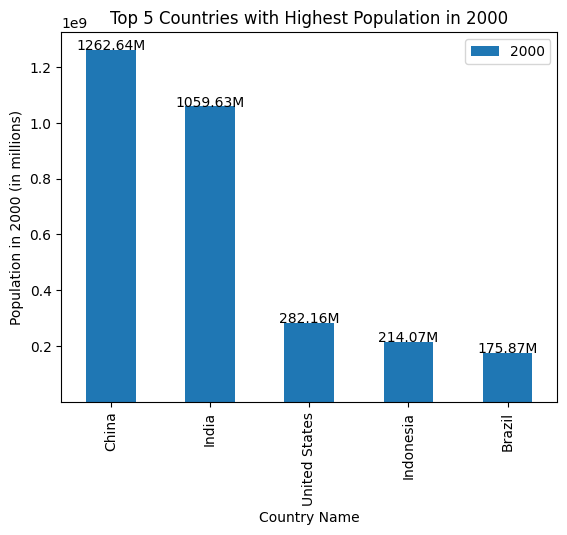

In [240]:
top_5_population_graph('2000')

In [221]:
#create a new function with only the top 5 countries for each year
def top_5_population_year(year):
    pop_in_year = new_population.nlargest(5, year)
    pop_in_year = pop_in_year[['Country Name', year]]
    pop_in_year.columns = ['Country Name', 'Population in ' +year+ ' (in millions)']
    pop_in_year['Population in ' +year+' (in millions)'] = pop_in_year['Population in ' +year+ ' (in millions)'].apply(lambda x: round(x/1000000, 2))
    pop_in_year.index = [1,2,3,4,5]
    return pop_in_year


In [222]:
pop_2000 = top_5_population_year('2012')
pop_2000

,Country Name,Population in 2012 (in millions)
1,China,1354.19
2,India,1274.49
3,United States,313.88
4,Indonesia,250.22
5,Pakistan,202.21


In [263]:
#create a function to extract row for a given country
def country_population(country):
    country_population = new_population.copy()
    country_population = country_population.loc[country_population['Country Name'] == country]
    country_population.loc[:,'1990':'2021'] = country_population.loc[:,'1990':'2021'].apply(lambda x: round(x/1000000, 2))
    return country_population


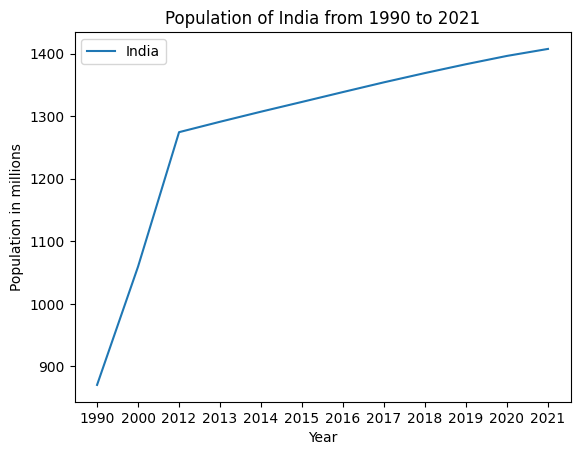

In [292]:
population_of_india = country_population('India')
population_of_india
#iterate through each row and plot the population of the country for each year with data points
for index, row in population_of_india.iterrows():
    plt.plot(row['1990':'2021'], label=row['Country Name'])
    plt.xlabel('Year')
    plt.ylabel('Population in millions')
    plt.title('Population of India from 1990 to 2021')
    plt.legend()
    plt.show()



In [268]:
# create a function to calculate the growth rate of population for a given country
def population_growth_rate(country):
    country_population.loc[:,'1990':'2021'] = country_population.loc[:,'1990':'2021'].pct_change(axis=1)
    return country_population

In [267]:
#plot the population of a given country for each year
def country_population_graph(country):
    country_population(country).plot(x='Country Name', y=country_population(country).columns[1:], kind='bar')
    plt.xlabel('Country Name')
    plt.ylabel('Population in millions')
    plt.title('Population of ' + country + ' from 1990 to 2021')
    plt.show()

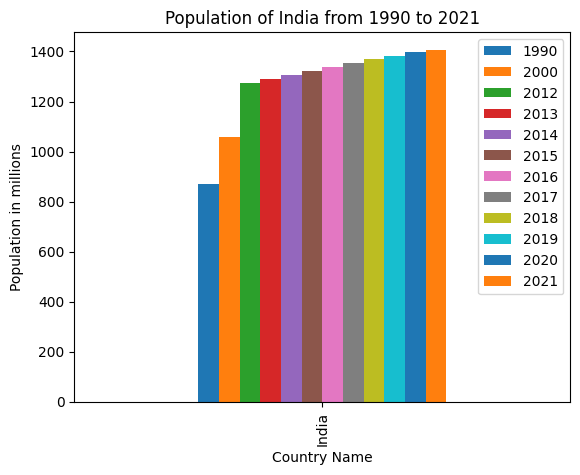

In [269]:
country_population_graph('India')

In [224]:
#select a row using index number
world_population = population.tail(1)